In [26]:
from astropaint import Catalog, Canvas, Painter
from astropaint.profiles import NFW, Battaglia16

import matplotlib.pyplot as plt 
from matplotlib import rcParams

rcParams["figure.dpi"]=100

# Load the Catalog 

In [2]:
catalog = Catalog("websky_2x2")

Catalog loaded from:
/Users/siavashyasini/Dropbox/cosmology/Projects/2020/AstroPaint/astropaint/data/websky_2x2.csv
Building the dataframe and updating all the parameters...

Done!


In [3]:
catalog.data.head()

,x,y,z,v_x,v_y,v_z,M_200c,R,D_c,lat,...,R_200c,c_200c,R_ang_200c,rho_s,R_s,v_r,v_th,v_ph,v_lat,v_lon
0,3089.9556,1.636990,2.776114,402.95422,164.697630,313.47760,5.093206e+12,3.138317,3089.957281,0.051476,...,0.192980,5.257950,0.403910,2.062540e+15,0.036702,403.322892,-313.115369,164.484131,313.115369,164.484131
1,3096.4026,0.346155,2.607054,328.57767,38.913113,304.94200,3.280243e+12,2.710203,3096.403717,0.048241,...,0.166440,5.486880,0.348084,2.283300e+15,0.030334,328.838651,-304.665238,38.876380,304.665238,38.876380
2,2535.0215,0.494748,1.872513,-221.48776,55.406178,183.67040,3.875824e+12,2.865197,2535.022240,0.042322,...,0.196682,5.427123,0.449482,1.594290e+15,0.036241,-221.341213,-183.833945,55.449404,183.833945,55.449404
3,2545.5068,3.827994,3.795186,-441.95447,281.371900,206.09782,8.626426e+12,3.740906,2545.512507,0.085424,...,0.256263,5.021379,0.584442,1.342990e+15,0.051034,-441.223068,-206.755883,282.036203,206.755883,282.036203
4,2783.2847,0.428915,2.538868,-91.40550,229.916000,432.97037,1.988615e+12,2.293771,2783.285891,0.052264,...,0.149909,5.776688,0.327742,2.133540e+15,0.025951,-90.975081,-433.053536,229.930083,433.053536,229.930083


In [4]:
catalog.size

82632

Check out the redshift and mass histograms

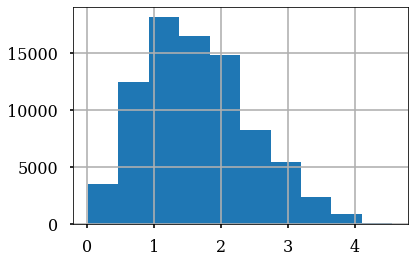

In [5]:
catalog.data.redshift.hist()

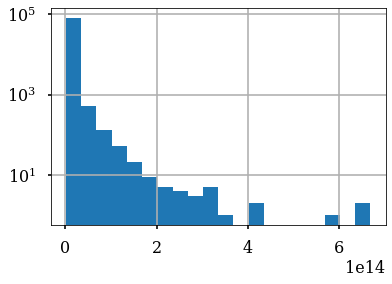

In [6]:
catalog.data.M_200c.hist(bins=20, log=True)

In [9]:
f"Minimum M_200c: {catalog.data.M_200c.min():.2e}"

'Minimum M_200c: 1.00e+13'

In [10]:
catalog.cut_lon_lat(lon_range=[0,1], lat_range=[0,1])
catalog.cut_M_200c(mass_min=1E13)

Catalog data has been modified...

Building the dataframe and updating all the parameters...

Done!
Catalog data has been modified...

Building the dataframe and updating all the parameters...

Done!


In [11]:
catalog.size

1376

# Paint kSZ

In [22]:
nside = 4096
canvas = Canvas(catalog, nside=nside, R_times=3)

/Users/siavashyasini/.local/lib/python3.7/site-packages/healpy/projaxes.py:1155: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


88.08582233904805 90.91417766095195 -0.9142315105544221 1.9142315105544223
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


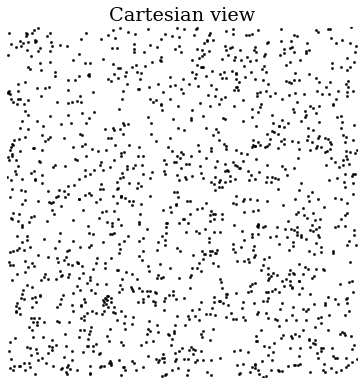

In [18]:
canvas.show_halo_centers("cart", lonra=[0,1], latra=[0,1], s=5, color='k')

In [23]:
painter = Painter(Battaglia16.kSZ_T)
#painter = Painter(NFW.kSZ_T) ## A faster but inaccurate option

The template 'kSZ_T' takes in the following arguments:
['R', 'R_200c', 'M_200c', 'v_r', 'redshift']
and the following keyword-only arguments:
['T_cmb']


In [25]:
canvas.clean() #make sure canvas is clean
painter.spray(canvas,
              #cache=True, ## uncomment to cache the profiles to disc; makes the painting slower
              #with_ray=True, ##uncomment to paint in parallel; do not use with cache=True
             )

Painting the canvas...
No template_kwargs provided
spray_df.columns = Index(['R_200c', 'v_r', 'M_200c', 'redshift'], dtype='object')



Your artwork is finished. Check it out with Canvas.show_map()


/Users/siavashyasini/.local/lib/python3.7/site-packages/healpy/projaxes.py:1196: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/Users/siavashyasini/.local/lib/python3.7/site-packages/healpy/projaxes.py:1155: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


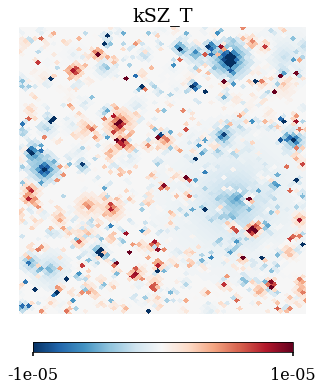

In [21]:
canvas.show_map("cartesian",
                title=f"{painter.template_name}",
                lonra=[0,1], latra=[0,1], 
                min=-1E-5, max=1E-5)